In [18]:
import numpy as np
fp = 'C:\\Users\\amer_\\OneDrive - Greenhill School\\Documents\\GitHub\\DataScience\\Numpy\\MessingWithNumpyFunctions\\WeatherDataProjectAnalysis\\Dataset.txt'
data = np.genfromtxt(fp, skip_header=1, usecols=(0,1,2,3))
date = data[:,0]
t_AVG= data[:,1]
t_MIN = data [:,2]
t_MAX = data [:,3]

In [13]:
date_mask = np.isfinite(date)
# Above is the mdata mask for counting the valid date entries that exist as numbers
print("Number of years:", np.count_nonzero(date_mask))
#Above prints the count returned from the data mask
missing_date_mask = ~np.isfinite(date) 
# Checks for consecutive entries..? Then assignes it to the missing values data mask
print("Number of missing years:", np.count_nonzero(missing_date_mask))
# Counts the number of missing years from the object missing_data_mask
t_AVG_mask = np.isfinite(t_AVG)
print("Number of average temps:", np.count_nonzero(t_AVG_mask))
#Same thing as befores


Number of years: 49
Number of missing years: 0
Number of average temps: 46


In [20]:
missing_t_MAX_mask = ~np.isfinite(t_MAX)
print("Number of missing tmax values:", np.count_nonzero(missing_t_MAX_mask))
tmax_mask = np.isfinite(t_MAX)
tmin_mask = np.isfinite(t_MIN)

# Making a mask without the bad values
tmax_clean = t_MAX[tmax_mask]
tmin_clean = t_MIN[tmin_mask]
# Remakign the array with only real values
date_clean = date[tmax_mask]
# Removing corresponding dates
#The tutorial assumes you don't have the t_AVG dataset btw, so we ignore that
tmax_total = tmax_clean[(date_clean >= 1976) & (date_clean <= 2021)]
#New array with the datapoints in that range


Number of missing tmax values: 3


In [15]:
print(tmax_total.mean())
#Average of the array


12.823255813953487


#Graphing Min and Max

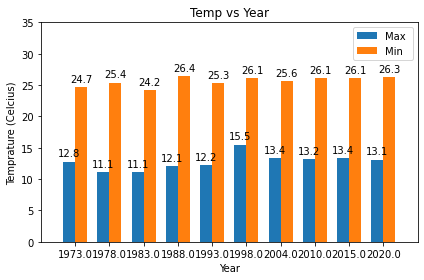

In [44]:
import numpy as np

labels = date_clean[::5]
blue_means = tmax_clean[::5]
red_means= tmin_clean[::5]
x = np.arange(len(labels))
width = .35
fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2,blue_means,width,label= 'Max ')
rects2 = ax.bar(x+width/2,red_means,width,label= 'Min')
ax.set_ylabel('Temprature (Celcius)')
ax.set_xlabel('Year')
ax.set_title('Temp vs Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.axis([-1,10,0,35])
fig.tight_layout()

plt.show()